In [41]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.seliem.mx/img/tecno.png")

### Analisis de Datos
### Visualización de medidores de Internet
### José Gabriel Rodriguez Rivas
### Guillermo Villarreal Gallegos

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_compact2 = pd.read_csv("rpi_data_compact2.csv") 
df_compact2.head(3)

,Unnamed: 0,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,0,26.992,91.80,14.31,2016-11-24,13:36:25
1,1,24.532,88.19,14.12,2016-11-24,13:36:55
2,2,20.225,59.86,14.11,2016-11-24,13:37:25


In [3]:
df_compact2.drop(['Unnamed: 0'], axis=1, inplace=True)
df_compact2.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,26.992,91.80,14.31,2016-11-24,13:36:25
1,24.532,88.19,14.12,2016-11-24,13:36:55
2,20.225,59.86,14.11,2016-11-24,13:37:25
3,19.332,91.81,14.22,2016-11-24,13:37:57
4,22.494,92.05,14.08,2016-11-24,13:38:27


In [4]:
NaNs_in_df = df_compact2.isnull()
print(type(NaNs_in_df))
NaNs_in_df.head()

<class 'pandas.core.frame.DataFrame'>


,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [5]:
NaNs_per_column = NaNs_in_df.sum()
print(type(NaNs_per_column))
NaNs_per_column.head()

<class 'pandas.core.series.Series'>


Ping (ms)            1
Download (Mbit/s)    1
Upload (Mbit/s)      7
Date                 7
Time                 8
dtype: int64

In [6]:
NaNs_total = NaNs_per_column.sum()
NaNs_total

24

In [7]:
df_compact2.isnull().sum().sum()

24

In [8]:
NaNs_pct = np.round(df_compact2.isnull().sum().sum()/float(len(df_compact2)*len(df_compact2.columns))*100, decimals = 4)
print('The DataFrame contains : {} NaNs, equals to {} of the measurements'.format(NaNs_total, NaNs_pct))

The DataFrame contains : 24 NaNs, equals to 0.7059 of the measurements


In [9]:
    df_compact2_clean = df_compact2.dropna()

In [10]:
print(len(df_compact2))
print(len(df_compact2_clean))

680
672


# Los valores impares aparecen  por que antes de eso se dropearon los valores NaN

In [11]:
df_compact2.dtypes

Ping (ms)            float64
Download (Mbit/s)    float64
Upload (Mbit/s)      float64
Date                  object
Time                  object
dtype: object

In [12]:
str_val = '10.56'
float_val = float(str_val)
print(str_val, type(str_val), float_val, type(float_val))

10.56 <class 'str'> 10.56 <class 'float'>


In [13]:
df_compact2_clean['Ping (ms)_float'] = df_compact2_clean['Ping (ms)'].apply(lambda val: float(val))
df_compact2_clean['Download (Mbit/s)_float'] = df_compact2_clean['Download (Mbit/s)'].apply(lambda val: float(val))

C:\Users\memow\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\memow\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
df_compact2.dtypes

Ping (ms)            float64
Download (Mbit/s)    float64
Upload (Mbit/s)      float64
Date                  object
Time                  object
dtype: object

In [15]:
df_compact2_clean.dtypes

Ping (ms)                  float64
Download (Mbit/s)          float64
Upload (Mbit/s)            float64
Date                        object
Time                        object
Ping (ms)_float            float64
Download (Mbit/s)_float    float64
dtype: object

In [16]:
df_compact2_clean.drop(['Ping (ms)', 'Download (Mbit/s)'], axis = 1, inplace = True)

C:\Users\memow\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [17]:
df_compact2_clean.head()

,Upload (Mbit/s),Date,Time,Ping (ms)_float,Download (Mbit/s)_float
0,14.31,2016-11-24,13:36:25,26.992,91.80
1,14.12,2016-11-24,13:36:55,24.532,88.19
2,14.11,2016-11-24,13:37:25,20.225,59.86
3,14.22,2016-11-24,13:37:57,19.332,91.81
4,14.08,2016-11-24,13:38:27,22.494,92.05


In [18]:
columnas = {'Ping (ms)_float':'Ping (ms)',
            'Download (Mbit/s)_float':'Download (Mbit/s)',}
df_compact2_clean.rename(columns =  columnas, inplace = True)

C:\Users\memow\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [19]:
de_compact2_clean = df_compact2_clean.reindex(columns = ['Date', 'Time', 'Ping (ms)','Download (Mbit/s)','Upload (Mbits/s)']);

In [20]:
de_compact2_clean.head()

,Date,Time,Ping (ms),Download (Mbit/s),Upload (Mbits/s)
0,2016-11-24,13:36:25,26.992,91.80,NaN
1,2016-11-24,13:36:55,24.532,88.19,NaN
2,2016-11-24,13:37:25,20.225,59.86,NaN
3,2016-11-24,13:37:57,19.332,91.81,NaN
4,2016-11-24,13:38:27,22.494,92.05,NaN


In [22]:
df_compact2_clean.to_csv('rpi_data_processed.csv', index=False)
df_clean = df_compact2_clean

In [23]:
means =df_clean.mean() 
stands =df_clean.std()

#Place mean and std for each column in a tuple
stats_ping = (means['Ping (ms)'], stands['Ping (ms)'])
stats_download = (means['Download (Mbit/s)'], stands['Download (Mbit/s)'])
stats_upload = (means['Upload (Mbit/s)'], stands['Upload (Mbit/s)'])

#Print the mean value ± the standard deviation, including measuring units
print('Average ping time: {} ± {} ms'.format(*stats_ping))
print('Average download speed: {} ± {} Mbit/s'.format(*stats_download))
print('Average upload speed: {} ± {} Mbit/s'.format(*stats_upload))

Average ping time: 21.113875000000007 ± 5.164907779028767 ms
Average download speed: 90.45629464285713 ± 3.4633514246179895 Mbit/s
Average upload speed: 13.69681547619048 ± 1.0810800645602712 Mbit/s


In [24]:
means = df_clean.mean()
print(means)
means['Ping (ms)']

Upload (Mbit/s)      13.696815
Ping (ms)            21.113875
Download (Mbit/s)    90.456295
dtype: float64


21.113875000000007

In [25]:
df_clean['Ping (ms)'].values.sum()/len(df_clean)
print(df_clean['Ping (ms)'].mean())
print(df_clean.mean()['Ping (ms)'])

21.113875000000007
21.113875000000007


In [26]:
df_clean['Date'][0]

'2016-11-24'

In [27]:
mins = df_clean.min()
maxs = df_clean.max()

#Place mean and std for each column in a tuple
mima_ping = (mins['Ping (ms)'], maxs['Ping (ms)'])
mima_download = (mins['Download (Mbit/s)'], maxs['Download (Mbit/s)'])
mima_upload = (mins['Upload (Mbit/s)'], maxs['Upload (Mbit/s)'])

#Print the mean and max values, including measuring units
print('Min ping time: {} ms. Max ping time: {} ms'.format(*mima_ping))
print('Min download speed: {} Mbit/s. Max download speed: {} Mbit/s'.format(*mima_download))
print('Min upload speed: {} Mbit/s. Max upload speed: {} Mbit/s'.format(*mima_upload))

Min ping time: 16.167 ms. Max ping time: 76.528 ms
Min download speed: 58.48 Mbit/s. Max download speed: 92.87 Mbit/s
Min upload speed: 6.21 Mbit/s. Max upload speed: 14.55 Mbit/s


In [28]:
df_clean.describe()

,Upload (Mbit/s),Ping (ms),Download (Mbit/s)
count,672.000000,672.000000,672.000000
mean,13.696815,21.113875,90.456295
std,1.081080,5.164908,3.463351
min,6.210000,16.167000,58.480000
25%,13.640000,19.113500,90.220000
50%,13.980000,20.320000,91.565000
75%,14.180000,21.837750,92.070000
max,14.550000,76.528000,92.870000


In [29]:

argmin_ping = df_clean['Ping (ms)'].argmin()
argmax_ping = df_clean['Ping (ms)'].argmax()

# Find the min and max download speed
argmin_download = df_clean['Download (Mbit/s)'].argmin()
argmax_download = df_clean['Download (Mbit/s)'].argmax()

# Find the min and max upload speed
argmin_upload = df_clean['Upload (Mbit/s)'].argmin()
argmax_upload = df_clean['Upload (Mbit/s)'].argmax()

In [30]:
df = pd.DataFrame({'field_1': [0,1], 'field_2': [0,2]})
df.head()

,field_1,field_2
0,0,0
1,1,2


In [31]:
df.iloc[1]['field_1']

1

In [32]:
print('Ping measure reached minimum on {} at {}'.format(df_clean.loc[argmin_ping].Date, 
                                                       df_clean.loc[argmin_ping].Time))

print('Download measure reached minimum on {} at {}'.format(df_clean.loc[argmin_download].Date, 
                                                       df_clean.loc[argmin_download].Time))

print('Upload measure reached minimum on {} at {}'.format(df_clean.loc[argmin_upload].Date, 
                                                       df_clean.loc[argmin_upload].Time))

print('Ping measure reached maximum on {} at {}'.format(df_clean.loc[argmax_ping].Date, 
                                                       df_clean.loc[argmax_ping].Time)) 

print('Download measure reached maximum on {} at {}'.format(df_clean.loc[argmax_download].Date, 
                                                       df_clean.loc[argmax_download].Time))

print('Upload measure reached maximum on {} at {}'.format(df_clean.loc[argmax_upload].Date, 
                                                       df_clean.loc[argmax_upload].Time))

Ping measure reached minimum on 2016-11-24 at 15:26:20
Download measure reached minimum on 2016-11-24 at 14:57:55
Upload measure reached minimum on 2016-11-24 at 17:31:47
Ping measure reached maximum on 2016-11-24 at 17:30:06
Download measure reached maximum on 2016-11-24 at 17:02:49
Upload measure reached maximum on 2016-11-24 at 18:02:15


In [33]:
df_corr = df_clean.corr()
df_corr

,Upload (Mbit/s),Ping (ms),Download (Mbit/s)
Upload (Mbit/s),1.000000,-0.463348,0.084833
Ping (ms),-0.463348,1.000000,-0.045271
Download (Mbit/s),0.084833,-0.045271,1.000000


In [34]:
corr = df_corr.values
print('Correlation coefficient between ping and download: {}'.format(corr[0, 1]))
print('Correlation coefficient between ping and upload: {}'.format(corr[0, 2]))
print('Correlation coefficient between upload and download: {}'.format(corr[2, 1]))

Correlation coefficient between ping and download: -0.46334785028069125
Correlation coefficient between ping and upload: 0.08483302146561673
Correlation coefficient between upload and download: -0.04527104992092839


## Parte 2: Visualización de datos

In [35]:
import matplotlib.pyplot as plt

# The following allows your Jupyter notebook to create plots inside a cell
%matplotlib inline

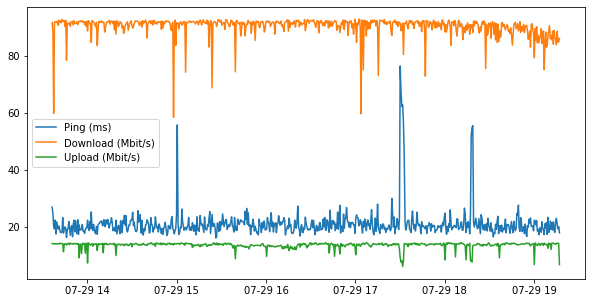

In [36]:
fig, ax = plt.subplots(figsize=(10, 5))

# Create x-axis
t = pd.to_datetime(df_clean['Time'])

# Plot three curves of different colors
ax.plot(t, df_clean['Ping (ms)'], label='Ping (ms)')
ax.plot(t, df_clean['Download (Mbit/s)'], label='Download (Mbit/s)')
ax.plot(t, df_clean['Upload (Mbit/s)'], label='Upload (Mbit/s)')

# Insert legend
ax.legend()
plt.show()

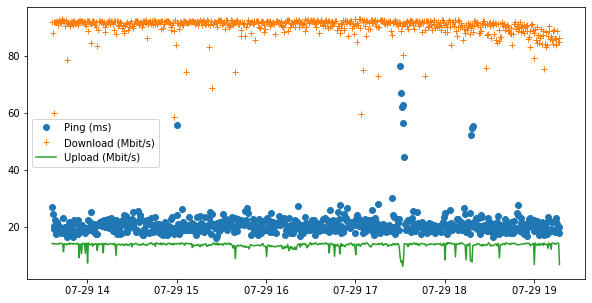

In [37]:
fig, ax = plt.subplots(figsize=(10, 5))

# Create x-axis
t = pd.to_datetime(df_clean['Time'])

# Plot three curves of different colors
ax.plot(t, df_clean['Ping (ms)'],'o', label='Ping (ms)')
ax.plot(t, df_clean['Download (Mbit/s)'],'+', label='Download (Mbit/s)')
ax.plot(t, df_clean['Upload (Mbit/s)'], label='Upload (Mbit/s)')

# Insert legend
ax.legend()
plt.show()

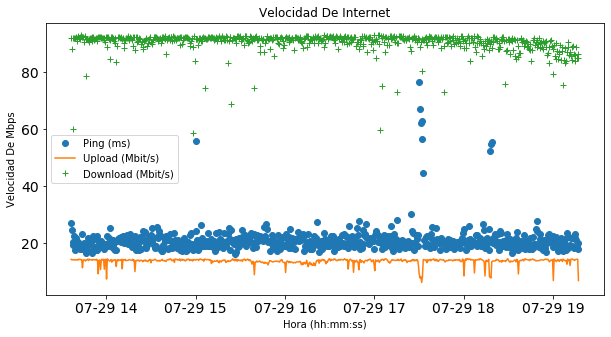

In [38]:
fig, ax = plt.subplots(figsize=(10, 5))
t = pd.to_datetime(df_clean['Time'])
ax.plot(t, df_clean['Ping (ms)'], 'o', label='Ping (ms)')
ax.plot(t, df_clean['Upload (Mbit/s)'], label='Upload (Mbit/s)')
ax.plot(t, df_clean['Download (Mbit/s)'],'+', label='Download (Mbit/s)')
ax.legend()
ax.set_xlabel('Hora (hh:mm:ss)')
ax.set_ylabel('Velocidad De Mbps')
ax.set_title('Velocidad De Internet')
ax.tick_params(labelsize=14)

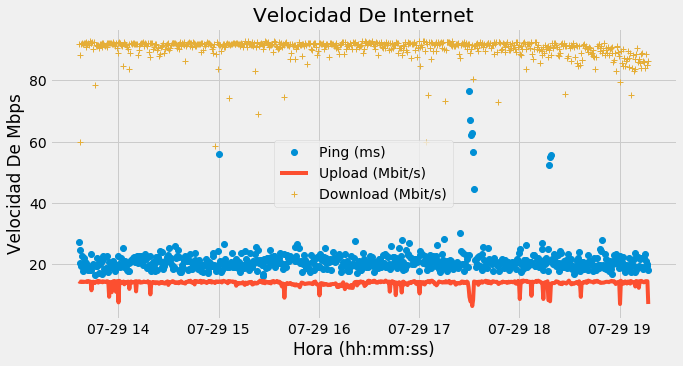

In [39]:
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(figsize=(10, 5))
    t = pd.to_datetime(df_clean['Time'])
    ax.plot(t, df_clean['Ping (ms)'], 'o', label='Ping (ms)')
    ax.plot(t, df_clean['Upload (Mbit/s)'], label='Upload (Mbit/s)')
    ax.plot(t, df_clean['Download (Mbit/s)'],'+', label='Download (Mbit/s)')
    ax.legend()
    ax.set_xlabel('Hora (hh:mm:ss)')
    ax.set_ylabel('Velocidad De Mbps')
    ax.set_title('Velocidad De Internet')
    ax.tick_params(labelsize=14)

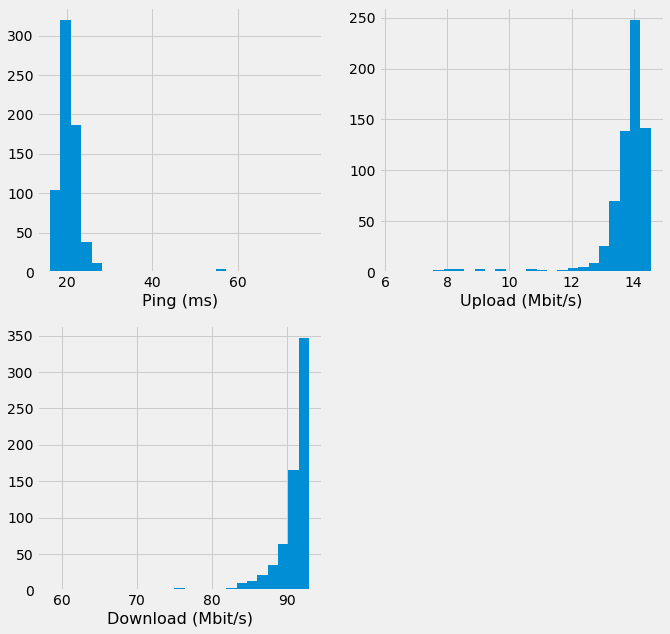

In [40]:
with plt.style.context('fivethirtyeight'):
    
    # Initialize figure
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))
    ax[0][0].hist(df_clean['Ping (ms)'], 25)
    ax[0][0].set_xlabel('Ping (ms)', fontsize=16)
    ax[0][0].tick_params(labelsize=14)
    ax[0][1].hist(df_clean['Upload (Mbit/s)'], 25)
    ax[0][1].set_xlabel('Upload (Mbit/s)', fontsize=16)
    ax[0][1].tick_params(labelsize=14)
    ax[1][0].hist(df_clean['Download (Mbit/s)'], 25)
    ax[1][0].set_xlabel('Download (Mbit/s)', fontsize=16)
    ax[1][0].tick_params(labelsize=14)
    ax[1][1].set_visible(False)